PyGSLIB
========

PPplot
---------------






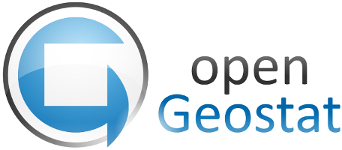

In [1]:
#general imports
import pygslib

Getting the data ready for work
---------
If the data is in GSLIB format you can use the function `pygslib.gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 


In [2]:
#get the data in gslib format into a pandas Dataframe
mydata= pygslib.gslib.read_gslib_file('../datasets/cluster.dat')  
true= pygslib.gslib.read_gslib_file('../datasets/true.dat') 
true['Declustering Weight'] = 1

## gslib probplot with bokeh

In [3]:
parameters_probplt = {
    # gslib parameters for histogram calculation  
    'iwt'  : 0, # input boolean (Optional: set True). Use weight variable?
    'va'   : mydata['Primary'], # input rank-1 array('d') with bounds (nd). Variable
    'wt'   : mydata['Declustering Weight'], # input rank-1 array('d') with bounds (nd) (Optional, set to array of ones). Declustering weight. 
    # visual parameters for figure (if a new figure is created)
    'figure' : None, # a bokeh figure object (Optional: new figure created if None). Set none or undefined if creating a new figure. 
    'title'  : 'Prob blot', # string (Optional, "Histogram"). Figure title
    'xlabel' : 'Primary', # string (Optional, default "Z"). X axis label 
    'ylabel' : 'P[Z<c]', # string (Optional, default "f(%)"). Y axis label
    'xlog' : 1, # boolean (Optional, default True). If true plot X axis in log sale.
    'ylog' : 1, # boolean (Optional, default True). If true plot Y axis in log sale.            
    # visual parameter for the probplt
    'style' : 'cross', # string with valid bokeh chart type 
    'color' : 'blue', # string with valid CSS colour (https://www.w3schools.com/colors/colors_names.asp), or an RGB(A) hex value, or tuple of integers (r,g,b), or tuple of (r,g,b,a) (Optional, default "navy")
    'legend': 'Non declustered', # string (Optional, default "NA"). 
    'alpha' : 1, # float [0-1] (Optional, default 0.5). Transparency of the fill colour 
    'lwidth': 0, # float (Optional, default 1). Line width
    # leyend
    'legendloc': 'bottom_right'} #  float (Optional, default 'top_right'). Any of top_left, top_center, top_right, center_right, bottom_right, bottom_center, bottom_left, center_left or center
    
parameters_probplt_dcl = parameters_probplt.copy()
parameters_probplt_dcl['iwt']=1
parameters_probplt_dcl['legend']='Declustered'
parameters_probplt_dcl['color'] = 'red'

parameters_probplt_true = parameters_probplt.copy()
parameters_probplt_true['va'] = true['Primary']
parameters_probplt_true['wt'] = true['Declustering Weight']
parameters_probplt_true['iwt']=0
parameters_probplt_true['legend']='True'
parameters_probplt_true['color'] = 'black'
parameters_probplt_true['style'] = 'line'
parameters_probplt_true['lwidth'] = 1


In [4]:
results, fig = pygslib.plothtml.probplt(parameters_probplt)

In [5]:
# add declustered to the plot
parameters_probplt_dcl['figure']= fig
results, fig = pygslib.plothtml.probplt(parameters_probplt_dcl)

In [6]:
# add true CDF to the plot
parameters_probplt_true['figure']=parameters_probplt_dcl['figure']
results, fig = pygslib.plothtml.probplt(parameters_probplt_true)

In [7]:
# show the plot
pygslib.plothtml.show(fig)